<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 5

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">A pressão de um gás tóxico em um grande reservatório foi monitorada todos os meses durante os 12 meses em que permaneceu armazenado, conforme os dados abaixo.</div>

|Tempo(meses)|P(atm)|
|:-:	|:-:	|
|0|5.0|
|1|5.0|
|2|5.0|
|3|5.0|
|4|5.0|
|5|5.0|
|6|5.0|
|7|5.0|
|8 |4.9|
|9 |4.7|
|10 |4.4|
|11 |4.0|
|12 |3.5|

<br><div style="text-align: justify">a) Crianças de uma escola próxima tiveram uma doença misteriosa no mês 5. Isto poderia ter sido causado pelo vazamento de gás? Determine, através de cálculos, quando o vazamento começou a ocorrer.
<br>
b) Qual a lei de potência que melhor se ajusta aos dados?
<br>
c) Qual o tempo necessário para que a pressão reduza em 5% do seu valor original?</div>

---

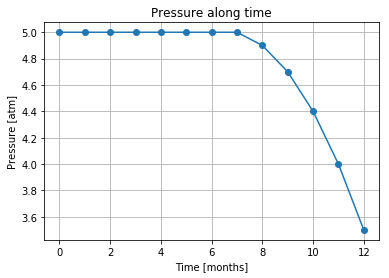

In [12]:
import matplotlib.pyplot as plt
import notebook_importer
import numpy as np
from modules import IE325

# ----- Dados
tempo_m = list(range(13))
p = [5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.9,4.7,4.4,4.0,3.5]

# ----- Plot    
plt.plot(tempo_m,p,'-o')
plt.title('Pressure along time')
plt.xlabel('Time [months]')
plt.ylabel('Pressure [atm]')
plt.grid()
plt.show() 

---
##### Início da Lei de Potência

Para aplicar a Lei de Potência, é necessário conhecer quando a degradação (vazamento) se deu início. Essa informação pode ser encontrada através da derivada, isto é, da taxa de variação dos dados.

Esse cálculo pode ser aplicado ponto a ponto de três formas, considerando:

- O ponto anterior
- O próximo ponto
- A média entre dos dois pontos laterais


Assim, calculamos essas derivadas através da função "StartLaw" e obtemos o *index* da série de dados onde se inicia a Lei de Potência. Esse valor corresponde, no problema, o começo do vazamento de gás.

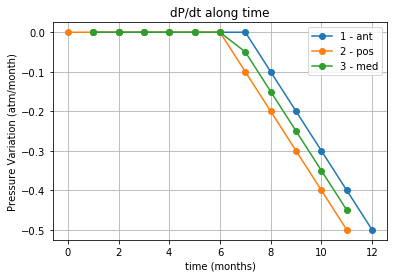

O mês da primeira variação na pressão do gas é quando se iniciou o vazamento e a partir de quando pode ser aplicada a Power Law: MÊS 6


In [13]:

dp_1, dt_1, dp_2, dt_2, dp_3, dt_3, index2law = IE325.StartLaw(tempo_m,p)

# ----- Plot    
plt.plot(dt_1,dp_1,'-o',dt_2,dp_2,'-o',dt_3,dp_3,'-o')
plt.title('dP/dt along time')
plt.xlabel('time (months)')
plt.ylabel('Pressure Variation (atm/month)')
plt.legend(['1 - ant','2 - pos','3 - med'])
plt.grid()
plt.show()



#Exibe o minimo dos 3 meses, ou seja, o tempo inicial para a variação no caso mais conservador
print("O mês da primeira variação na pressão do gas é quando se iniciou o vazamento e a partir \
de quando pode ser aplicada a Power Law: MÊS " + str(index2law))

Assim, conclui-se que a doença misteriosa não está relacionada com o vazamento de gás.


Embora o vazamento tenha começado no mês 6, vemos que s[0] é igual a s[1], o que ocasiona uma falha no cálculo (ln (0) !).

Assim, utilizaremos o mês 7 para os cálculos a seguir.

---

##### Lei de Potência

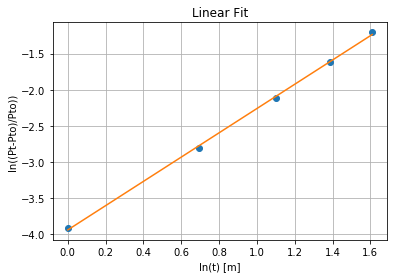

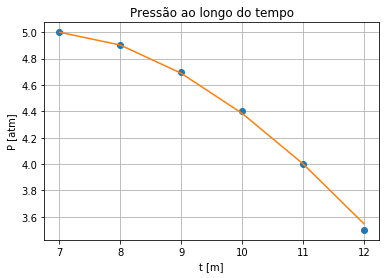

Equação de regimento:
P_atm(t) = 5.0 * (1 - 1.943e-02 * (t - 7)^1.681e+00)
P_atm(t) = 5.0 - 9.713e-02 * (t - 7)^1.681e+00)




In [14]:
index2law += 1
PL = IE325.PowerLaw(tempo_m[index2law:],p[index2law:], deltaT = tempo_m[index2law])

# ----- Dados linearizados
xlin, ylin = PL.LinearData()

# ----- Plot    
plt.plot(xlin,ylin,'o', xlin, PL.LinearFit())
plt.title('Linear Fit')
plt.xlabel('ln(t) [m]')
plt.ylabel('ln((Pt-Pto)/Pto))')
ax1 = plt.gca()
plt.grid()
plt.show() 

# ----- Plot    
plt.plot(tempo_m[index2law:],p[index2law:],'o', tempo_m[index2law:], PL.Find_S(tempo_m[index2law:]))
plt.title('Pressão ao longo do tempo')
plt.xlabel('t [m]')
plt.ylabel('P [atm]')
ax1 = plt.gca()
plt.grid()
plt.show() 

print("Equação de regimento:")
print("P_atm(t) = " + PL.LawComplete())
print("P_atm(t) = " + PL.LawSimple() + "\n\n")

##### Tempo necessário para que a pressão caia para 5% do valor inicial

In [9]:
p_target = p[0]*0.05
t_target = PL.Find_t(p_target);

print("O tempo necessario para atingir "+str(p_target)+" atm é de "+format(t_target,'.2f')+ \
      " meses a partir do começo do vazamento (ou "+format(t_target+index2law,'.2f')+" meses \
desde o início da observação).")

O tempo necessario para atingir 0.25 atm é de 17.12 meses a partir do começo do vazamento (ou 24.12 meses desde o início da observação).


##### Variáveis Associadas

In [10]:
print(PL.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 1.68075870045
b (intercept coef) = -3.94114527503
r_value (correlation coefficient) = 0.999570013959
std_err (standard error) = 0.0284660368651


Power Law Variables:

Ao = -0.0194259539405
n = 1.68075870045

